# Cargar librerias


In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Cargar Data Frame

In [3]:
df = pd.read_csv("general_data.csv")
rating = pd.read_csv("manager_survey_data.csv")
ratingEmployee = pd.read_csv("employee_survey_data.csv")

# Limpieaz de Datos

In [147]:
df.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
JobInvolvement             0
PerformanceRating          0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
CareerScore                0
dtype: int64

In [5]:
df.astype({
    'Age': 'int64',                      
    'Attrition': 'category',              
    'BusinessTravel': 'category',         
    'Department': 'category',             
    'DistanceFromHome': 'int64',          
    'Education': 'int64',                 
    'EducationField': 'category',         
    'EmployeeCount': 'int64'             
})

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,0.0,Y,20,8,0,5.0,4,4,1,2
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,0.0,Y,14,8,1,10.0,2,9,7,8


In [6]:
df["NumCompaniesWorked"] = df["NumCompaniesWorked"].fillna(0)
df["TotalWorkingYears"] = df["TotalWorkingYears"].fillna(0)


In [7]:
text_columns = ['Attrition', 'BusinessTravel', 'Department', 'EducationField']
for col in text_columns:
    df[col] = df[col].astype(str).str.strip().str.title()

In [8]:
df = pd.merge(df, rating, on = "EmployeeID", how = "inner")

In [9]:
df = pd.merge(df, ratingEmployee, on = "EmployeeID", how = "inner")

In [10]:
df.head(5)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,6,1,0,0,3,3,3.0,4.0,2.0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,6.0,3,5,1,4,2,4,3.0,2.0,4.0
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,5.0,2,5,0,3,3,3,2.0,2.0,1.0
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,13.0,5,8,7,5,2,3,4.0,4.0,3.0
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,9.0,2,6,0,4,3,3,4.0,1.0,3.0


In [11]:
media = int(df.TotalWorkingYears.mean())
df.TotalWorkingYears = df.TotalWorkingYears.fillna(media)

In [13]:
df.Over18.unique()

array(['Y'], dtype=object)

In [14]:
df = df.drop(
    labels = ["Over18"],
    axis = "columns"
)

In [15]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeID                   int64
Gender                      object
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked         float64
PercentSalaryHike            int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
JobInvolvement               int64
PerformanceRating            int64
EnvironmentSatisfaction    float64
JobSatisfaction            float64
WorkLifeBalance            float64
dtype: object

In [16]:
df.EnvironmentSatisfaction  = df.EnvironmentSatisfaction.fillna("no puntuado")
df.JobSatisfaction = df.JobSatisfaction.fillna("No puntuado")
df.WorkLifeBalance = df. WorkLifeBalance.fillna("No puntuado")

In [17]:
df.JobInvolvement  = df.JobInvolvement.replace({
    1 : "Low",
    2 : "Medium",
    3 :  "High",
    4 : "Very High"
})

In [18]:
df.PerformanceRating = df.PerformanceRating.replace({
    3 : "Excelent",
    4 : "Outstanding"
})

In [19]:
df.EnvironmentSatisfaction  = df.EnvironmentSatisfaction.replace({
    1.0 : "Low",
    2.0 : "Medium",
    3.0 :  "High",
    4.0 : "Very High"
})

In [20]:
df.JobSatisfaction  = df.JobSatisfaction.replace({
    1.0 : "Low",
    2.0 : "Medium",
    3.0 :  "High",
    4.0 : "Very High"
})

In [21]:
df.WorkLifeBalance  = df.WorkLifeBalance.replace({
    1.0 : "Low",
    2.0 : "Medium",
    3.0 :  "High",
    4.0 : "Very High"
})

# Analisis Exploratorio

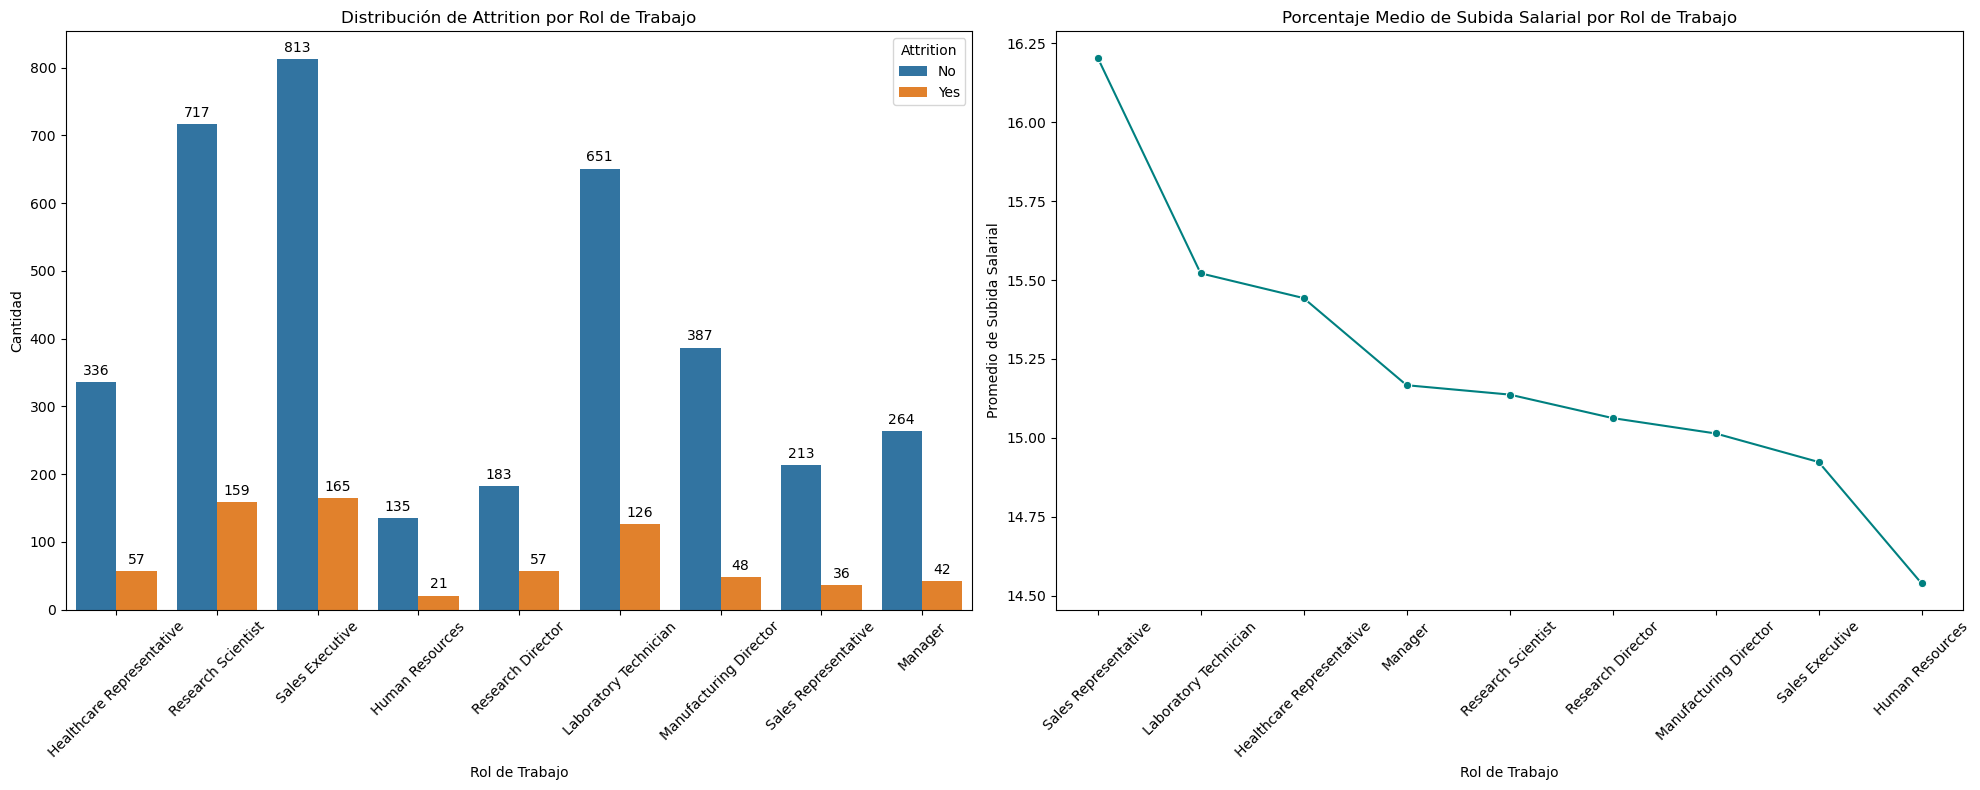

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

ax1 = sns.countplot(x='JobRole', hue='Attrition', data=df, ax=axes[0])
for container in ax1.containers:
    ax1.bar_label(container, fmt='%d', label_type='edge', padding=3)
ax1.set_title('Distribución de Attrition por Rol de Trabajo')
ax1.set_xlabel('Rol de Trabajo')
ax1.set_ylabel('Cantidad')
ax1.tick_params(axis='x', rotation=45)

avg_salary_hike = df.groupby('JobRole')['PercentSalaryHike'].mean().sort_values(ascending=False)
ax2 = sns.lineplot(x=avg_salary_hike.index, y=avg_salary_hike.values, marker='o', ax=axes[1], color='teal')
ax2.set_title('Porcentaje Medio de Subida Salarial por Rol de Trabajo')
ax2.set_xlabel('Rol de Trabajo')
ax2.set_ylabel('Promedio de Subida Salarial')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [25]:
attrition_percent = (
    df.groupby('JobRole')['Attrition']
    .value_counts(normalize=True)
    .unstack()
    * 100).round(2)


attrition_percent_yes = attrition_percent['Yes']
print(attrition_percent_yes.sort_values(ascending=False))

JobRole
Research Director            23.75
Research Scientist           18.15
Sales Executive              16.87
Laboratory Technician        16.22
Healthcare Representative    14.50
Sales Representative         14.46
Manager                      13.73
Human Resources              13.46
Manufacturing Director       11.03
Name: Yes, dtype: float64


Cuando Analizamos los roles de trabajo comparando con el Atrittion podemos ver que los roles con mas empleados tienen logicamente la mayor cantidad de gente que se va de la empresa, habria que centrarse en retener a los empleados de las categorias donde el porcentaje de personas que se van es mayor del 15%. Podemos ver que el mayor porcentaje de perdidas de empleados se encuentra entre los Research Director que represenata casi un 24% de perdidas de empleados pese a que el total de empleados de esa categoria es significativamente bajo.

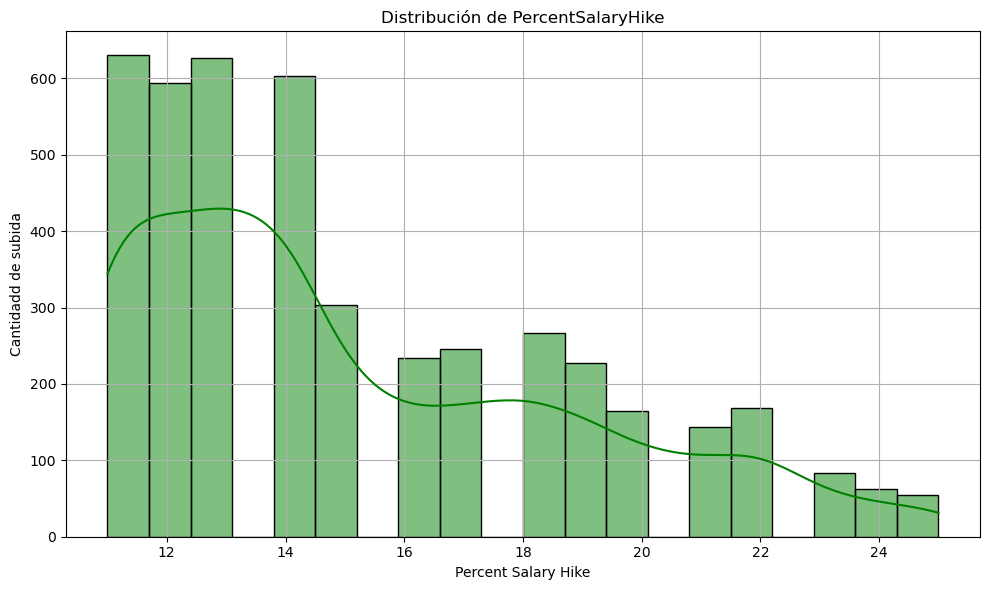

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='PercentSalaryHike', bins=20, kde=True, color='green')
plt.title('Distribución de PercentSalaryHike')
plt.xlabel('Percent Salary Hike')
plt.ylabel('Cantidadd de subida')
plt.grid(True)
plt.tight_layout()
plt.show()

Podemos pensar que uno de los motivos de que este patron son las subidas salariales, ya que vemos que estas categorias sonlas que tienen un bajo porcentaje de subida comparado con otros puestos con menos responsabilidades y que ademas la frecuencia de estas subidas baja bruscamente podemos ver una caida grande en la frecuencia apartir de 15% de subida salarial que baja a una frecuancia de 600 a la mitad 300.

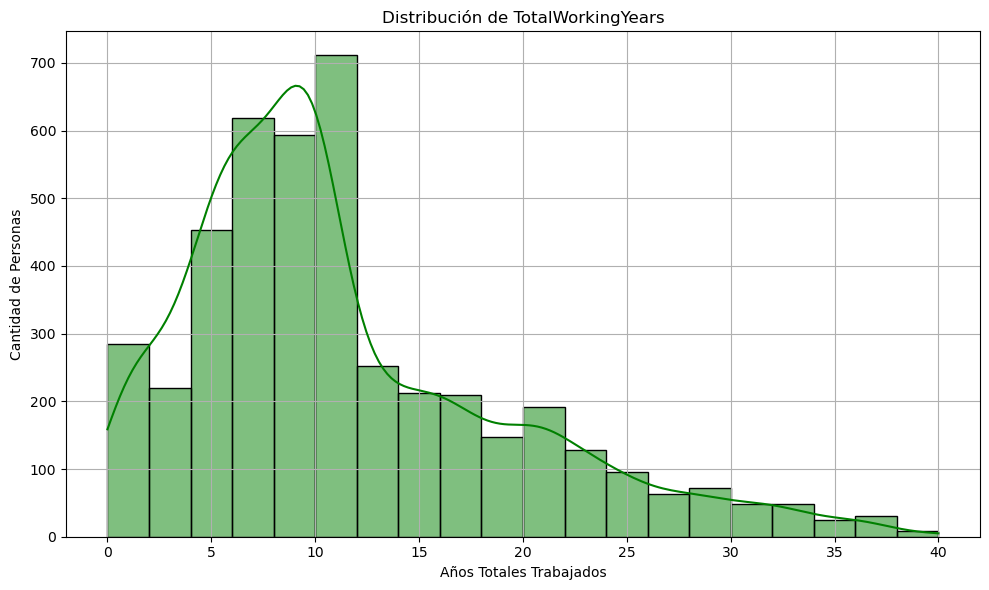

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='TotalWorkingYears', bins=20, kde=True, color='green')
plt.title('Distribución de TotalWorkingYears')
plt.xlabel('Años Totales Trabajados')
plt.ylabel('Cantidad de Personas')
plt.grid(True)
plt.tight_layout()
plt.show()

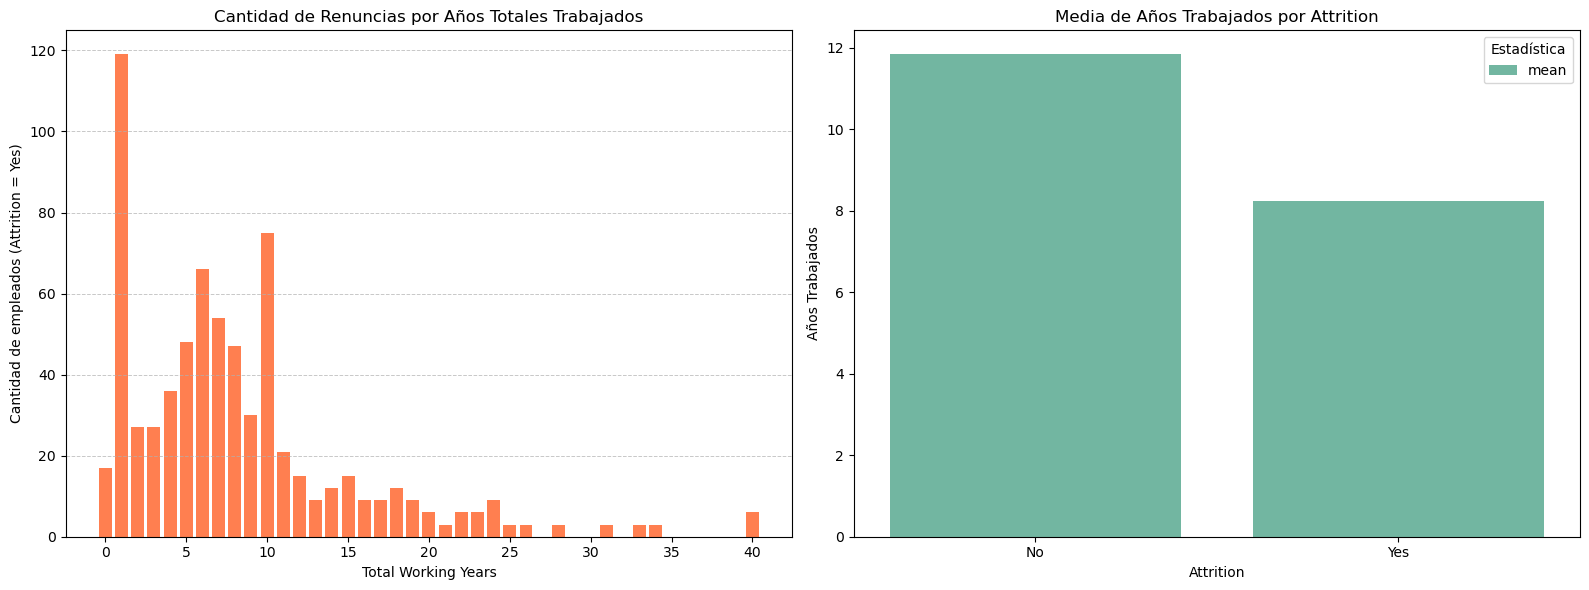

In [30]:
df_yes = df[df['Attrition'] == 'Yes']

summary_count = df_yes['TotalWorkingYears'].value_counts().sort_index().reset_index()
summary_count.columns = ['TotalWorkingYears', 'Count']

summary_stats = df.groupby('Attrition')['TotalWorkingYears'].agg(['mean']).round(2)
summary_melted = summary_stats.reset_index().melt(id_vars='Attrition', var_name='Estadística', value_name='Años')

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].bar(summary_count['TotalWorkingYears'], summary_count['Count'], color='coral')
axes[0].grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
axes[0].set_xlabel('Total Working Years')
axes[0].set_ylabel('Cantidad de empleados (Attrition = Yes)')
axes[0].set_title('Cantidad de Renuncias por Años Totales Trabajados')


sns.barplot(data=summary_melted, x='Attrition', y='Años', hue='Estadística', palette='Set2', ax=axes[1])
axes[1].set_title('Media de Años Trabajados por Attrition')
axes[1].set_xlabel('Attrition')
axes[1].set_ylabel('Años Trabajados')

plt.tight_layout()
plt.show()

Podemo ver que las personas se van, lo hacen durante los primeros 10 años de trabajo destacando 3 grandes puntos de salidas, el primer año de trabajo, y el rango de 5 a 10 años lo que nos hace pensar que habria que centrarse mucho en esos primeros 10 años de trabajo intentando dar mas benedicios o pluses por productividad o por proyectos para conseguir bajar ese porcentaje de salidas durante esos años 

In [32]:
summary_stats

,mean
Attrition,
No,11.84
Yes,8.23


In [33]:
df_yes = df[df['Attrition'] == 'Yes']
summary_count = df_yes.groupby('TotalWorkingYears')['Attrition'].count().reset_index()

In [34]:
summary_count.head(11)

,TotalWorkingYears,Attrition
0,0.0,17
1,1.0,119
2,2.0,27
3,3.0,27
4,4.0,36
5,5.0,48
6,6.0,66
7,7.0,54
8,8.0,47
9,9.0,30


In [35]:
PR_count = df.groupby('PerformanceRating')['Attrition'].agg(['count']).round(2).reset_index()
PR_count

,PerformanceRating,count
0,Excelent,3732
1,Outstanding,678


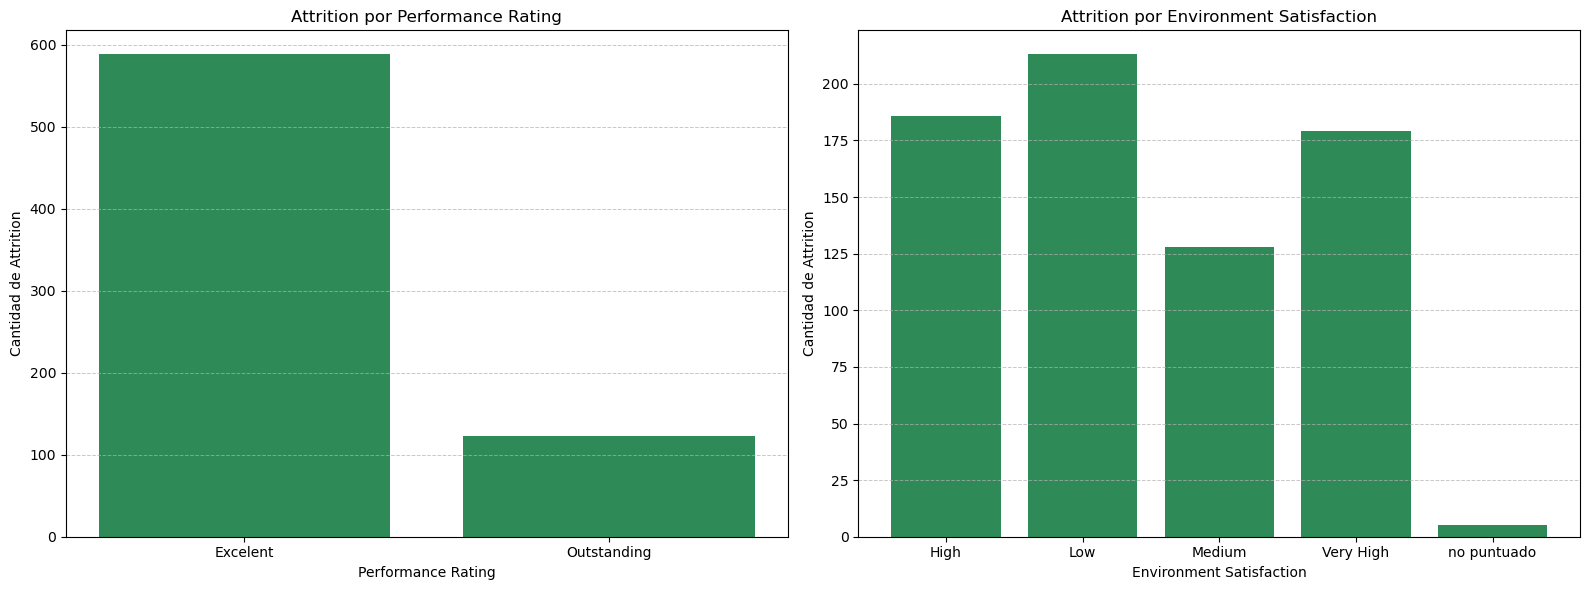

In [36]:
df_yes = df[df['Attrition'] == 'Yes']
PR_count = df_yes['PerformanceRating'].value_counts().sort_index().reset_index()
PR_count.columns = ['PerformanceRating', 'count']

ES_count = df_yes['EnvironmentSatisfaction'].value_counts().sort_index().reset_index()
ES_count.columns = ['EnvironmentSatisfaction', 'count']


fig, axes = plt.subplots(1, 2, figsize=(16, 6))


axes[0].bar(PR_count['PerformanceRating'], PR_count['count'], color='seagreen')
axes[0].set_title('Attrition por Performance Rating')
axes[0].set_xlabel('Performance Rating')
axes[0].set_ylabel('Cantidad de Attrition')
axes[0].grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)


axes[1].bar(ES_count['EnvironmentSatisfaction'], ES_count['count'], color='seagreen')
axes[1].set_title('Attrition por Environment Satisfaction')
axes[1].set_xlabel('Environment Satisfaction')
axes[1].set_ylabel('Cantidad de Attrition')
axes[1].grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

plt.tight_layout()
plt.show()

In [37]:
ES_count = df.groupby('EnvironmentSatisfaction')['Attrition'].agg(['count']).reset_index()
ES_count


,EnvironmentSatisfaction,count
0,High,1350
1,Low,845
2,Medium,856
3,Very High,1334
4,no puntuado,25


podemos ver que las personas que tienen un Enviroment Satisfaccion mas alto son tambien las personas con mayor atrrition es decir que no hay mucha retencion de talento eb este caso


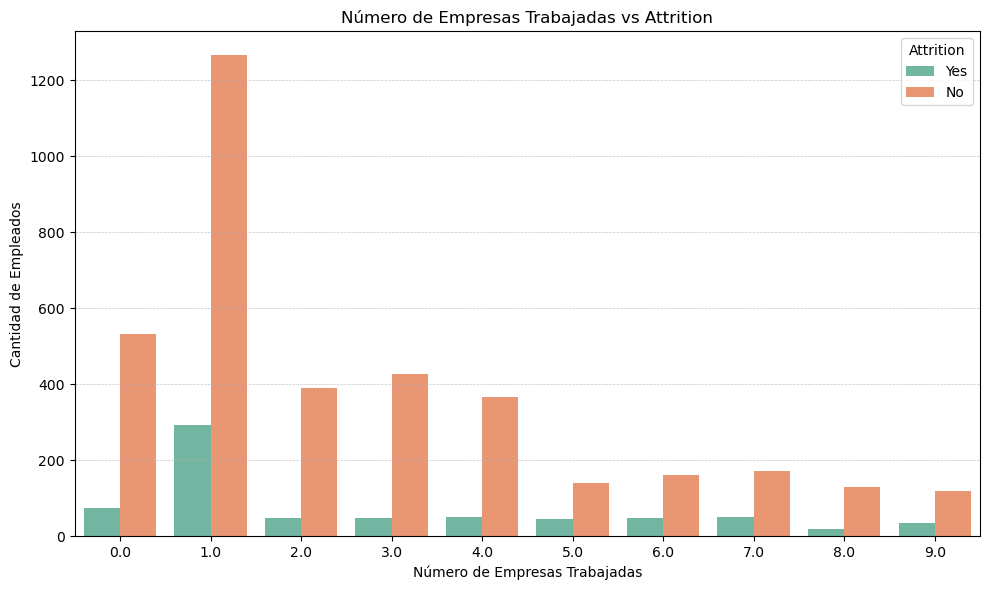

In [40]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='NumCompaniesWorked', hue='Attrition', palette='Set2')

plt.title('Número de Empresas Trabajadas vs Attrition')
plt.xlabel('Número de Empresas Trabajadas')
plt.ylabel('Cantidad de Empleados')
plt.legend(title='Attrition')
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

In [41]:
Fs = df.groupby("PercentSalaryHike")["MonthlyIncome"].agg(["count"]).reset_index()

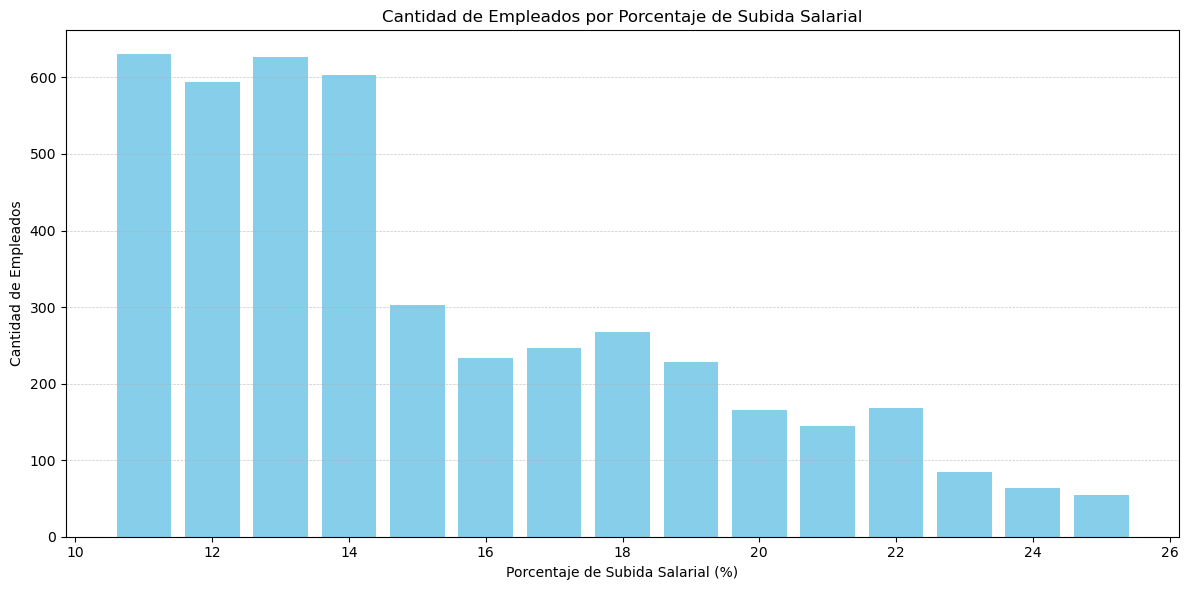

In [42]:
plt.figure(figsize=(12, 6))

plt.bar(Fs['PercentSalaryHike'], Fs['count'], color='skyblue')


plt.title('Cantidad de Empleados por Porcentaje de Subida Salarial')
plt.xlabel('Porcentaje de Subida Salarial (%)')
plt.ylabel('Cantidad de Empleados')
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)

plt.tight_layout()
plt.show()

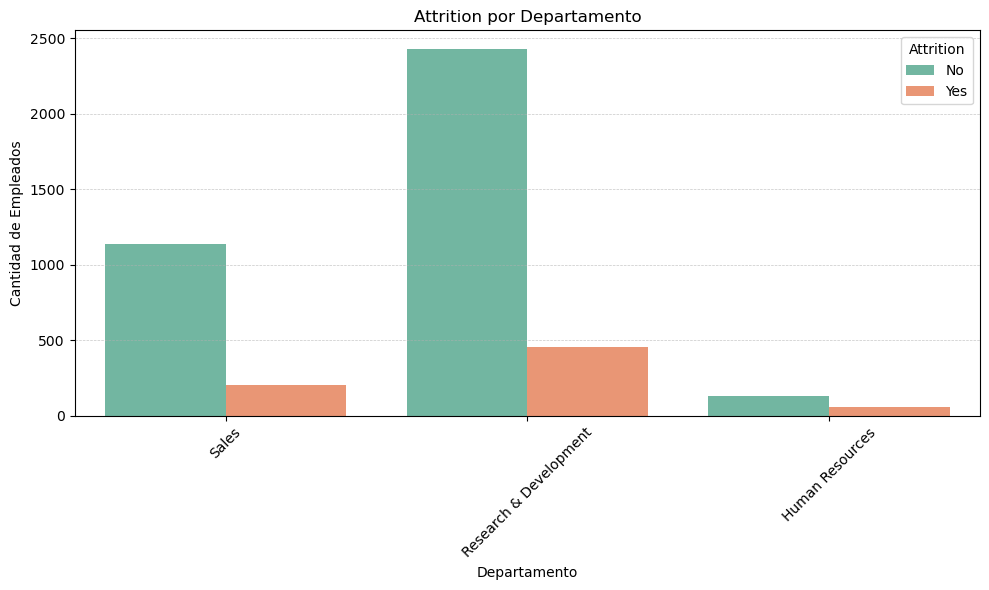

In [43]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Department', hue='Attrition', palette='Set2')

plt.title('Attrition por Departamento')
plt.xlabel('Departamento')
plt.ylabel('Cantidad de Empleados')
plt.legend(title='Attrition')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

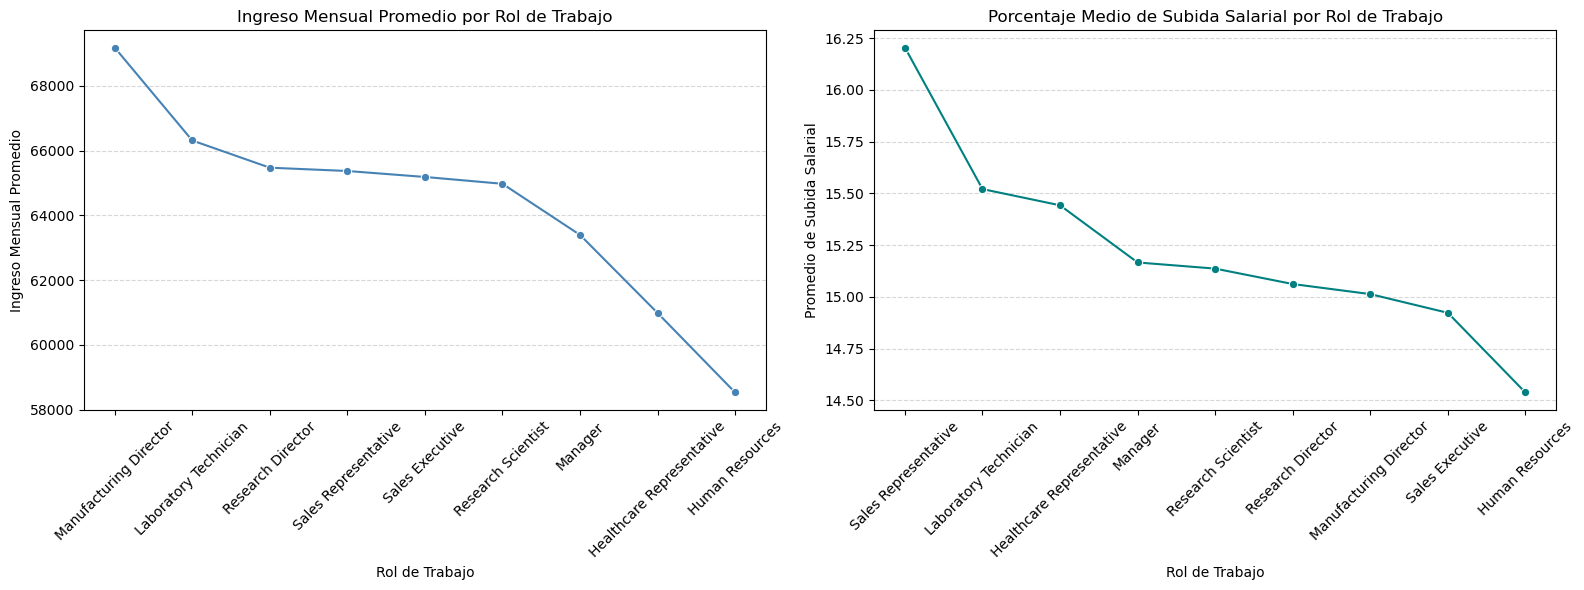

In [44]:
avg_income = df.groupby('JobRole')['MonthlyIncome'].mean().sort_values(ascending=False)
avg_salary_hike = df.groupby('JobRole')['PercentSalaryHike'].mean().sort_values(ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))


sns.lineplot(x=avg_income.index, y=avg_income.values, marker='o', ax=axes[0], color='steelblue')
axes[0].set_title('Ingreso Mensual Promedio por Rol de Trabajo')
axes[0].set_xlabel('Rol de Trabajo')
axes[0].set_ylabel('Ingreso Mensual Promedio')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', linestyle='--', alpha=0.5)

sns.lineplot(x=avg_salary_hike.index, y=avg_salary_hike.values, marker='o', ax=axes[1], color='teal')
axes[1].set_title('Porcentaje Medio de Subida Salarial por Rol de Trabajo')
axes[1].set_xlabel('Rol de Trabajo')
axes[1].set_ylabel('Promedio de Subida Salarial')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

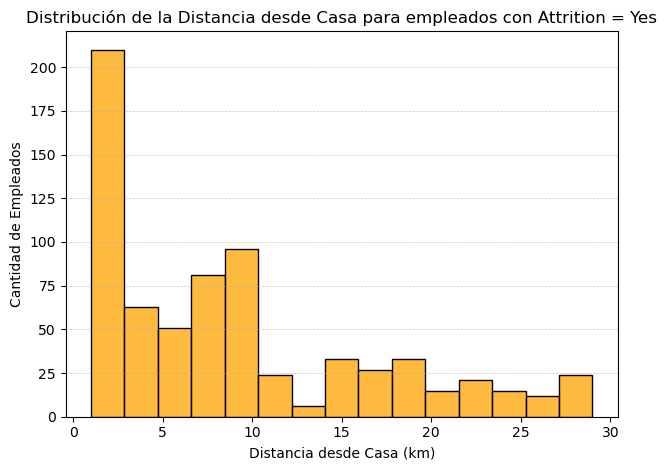

In [45]:
sns.histplot(df_yes['DistanceFromHome'], bins=15, kde=False, color='orange')

plt.title('Distribución de la Distancia desde Casa para empleados con Attrition = Yes')
plt.xlabel('Distancia desde Casa (km)')
plt.ylabel('Cantidad de Empleados')
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

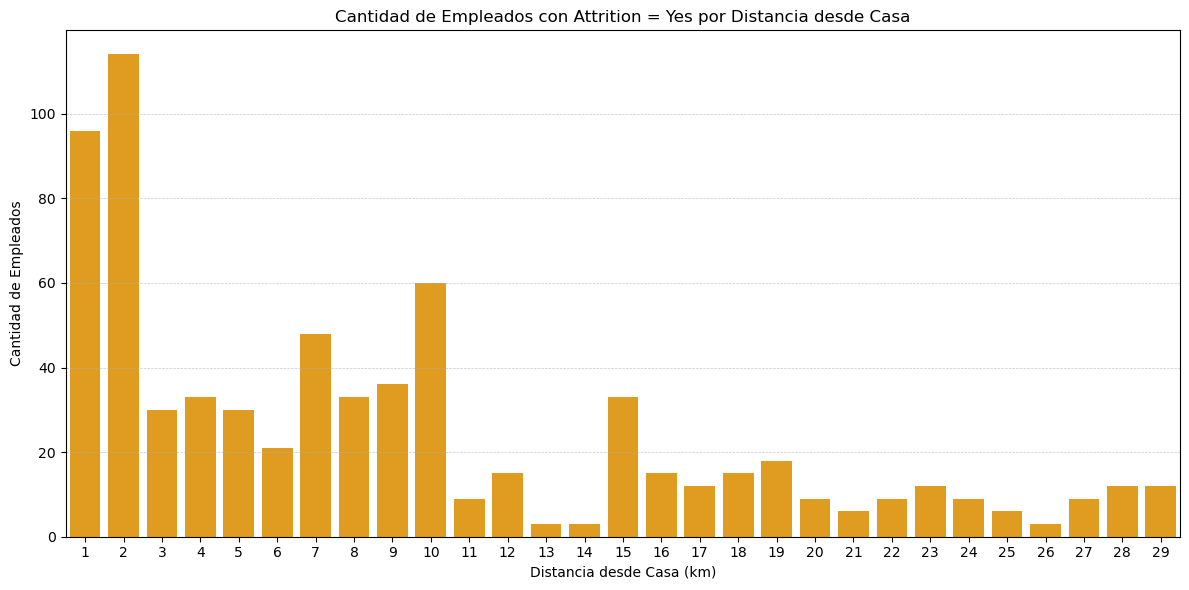

In [46]:
distance_counts = df_yes['DistanceFromHome'].value_counts().sort_index().reset_index()
distance_counts.columns = ['DistanceFromHome', 'Count']

# Graficar
plt.figure(figsize=(12, 6))
sns.barplot(data=distance_counts, x='DistanceFromHome', y='Count', color='orange')

plt.title('Cantidad de Empleados con Attrition = Yes por Distancia desde Casa')
plt.xlabel('Distancia desde Casa (km)')
plt.ylabel('Cantidad de Empleados')
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

In [47]:
df["Estabilidad"] = 1 / (1 + df["NumCompaniesWorked"])

df["CareerScore"] = (
    df["JobLevel"] +
    df["MonthlyIncome"] +
    df["Estabilidad"] +
    df["TotalWorkingYears"]
) / 4


In [48]:
df["Gender"] = np.where(df["Gender"] == "Female", 1, 0)

# Crear Modelo GXBoost

## Dividimos entre train y test 

In [51]:
df = df.drop(labels = "EmployeeCount", axis = "columns")

In [52]:
df = df.drop(labels = "EmployeeID", axis = "columns")

In [53]:
df = df.drop(labels = "Estabilidad", axis = "columns")

In [54]:
df["Attrition"] = df["Attrition"].map({"Yes": 1, "No": 0})

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
y = df.Attrition
X = df.drop(labels = "Attrition", axis = "columns")

In [57]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    train_size = 0.75,
    test_size = 0.25,
    random_state = 0
)

## Generamos Dummies

In [60]:
X_train = pd.get_dummies(
    X_train,
    columns = ["BusinessTravel", "Department", "EducationField", "JobRole", "MaritalStatus", "JobInvolvement", "PerformanceRating", "EnvironmentSatisfaction", "JobSatisfaction", "WorkLifeBalance"],
    drop_first = True
)

X_test = pd.get_dummies(
    X_test,
    columns = ["BusinessTravel", "Department", "EducationField", "JobRole", "MaritalStatus", "JobInvolvement", "PerformanceRating", "EnvironmentSatisfaction", "JobSatisfaction", "WorkLifeBalance"],
    drop_first = True
)

## Eliminamos columnas con poca corelación

In [61]:
X_train = X_train.drop(labels = "StandardHours", axis = "columns") 
X_train = X_train.drop(labels = "PerformanceRating_Outstanding", axis = "columns") 
X_train = X_train.drop(labels = "EnvironmentSatisfaction_no puntuado", axis = "columns")
X_train = X_train.drop(labels = "WorkLifeBalance_No puntuado", axis = "columns")
X_train = X_train.drop(labels = "JobSatisfaction_No puntuado", axis = "columns")
X_test = X_test.drop(labels = "StandardHours", axis = "columns") 
X_test = X_test.drop(labels = "PerformanceRating_Outstanding", axis = "columns") 
X_test = X_test.drop(labels = "EnvironmentSatisfaction_no puntuado", axis = "columns")
X_test = X_test.drop(labels = "WorkLifeBalance_No puntuado", axis = "columns")
X_test = X_test.drop(labels = "JobSatisfaction_No puntuado", axis = "columns")
X_train = X_train.drop(labels = "CareerScore", axis = "columns")
X_test = X_test.drop(labels = "CareerScore", axis = "columns")

In [62]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


# Entrenamos modelo

In [64]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [65]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

C:\Users\Lenovo\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:18:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [66]:
y_pred = xgb_model.predict(X_test)

# Comprobamos modelo

In [67]:
accuracy_score(y_test, y_pred)

0.9909338168631007

In [68]:
confusion_matrix(y_test, y_pred)

array([[929,   3],
       [  7, 164]], dtype=int64)

In [69]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       932
           1       0.98      0.96      0.97       171

    accuracy                           0.99      1103
   macro avg       0.99      0.98      0.98      1103
weighted avg       0.99      0.99      0.99      1103



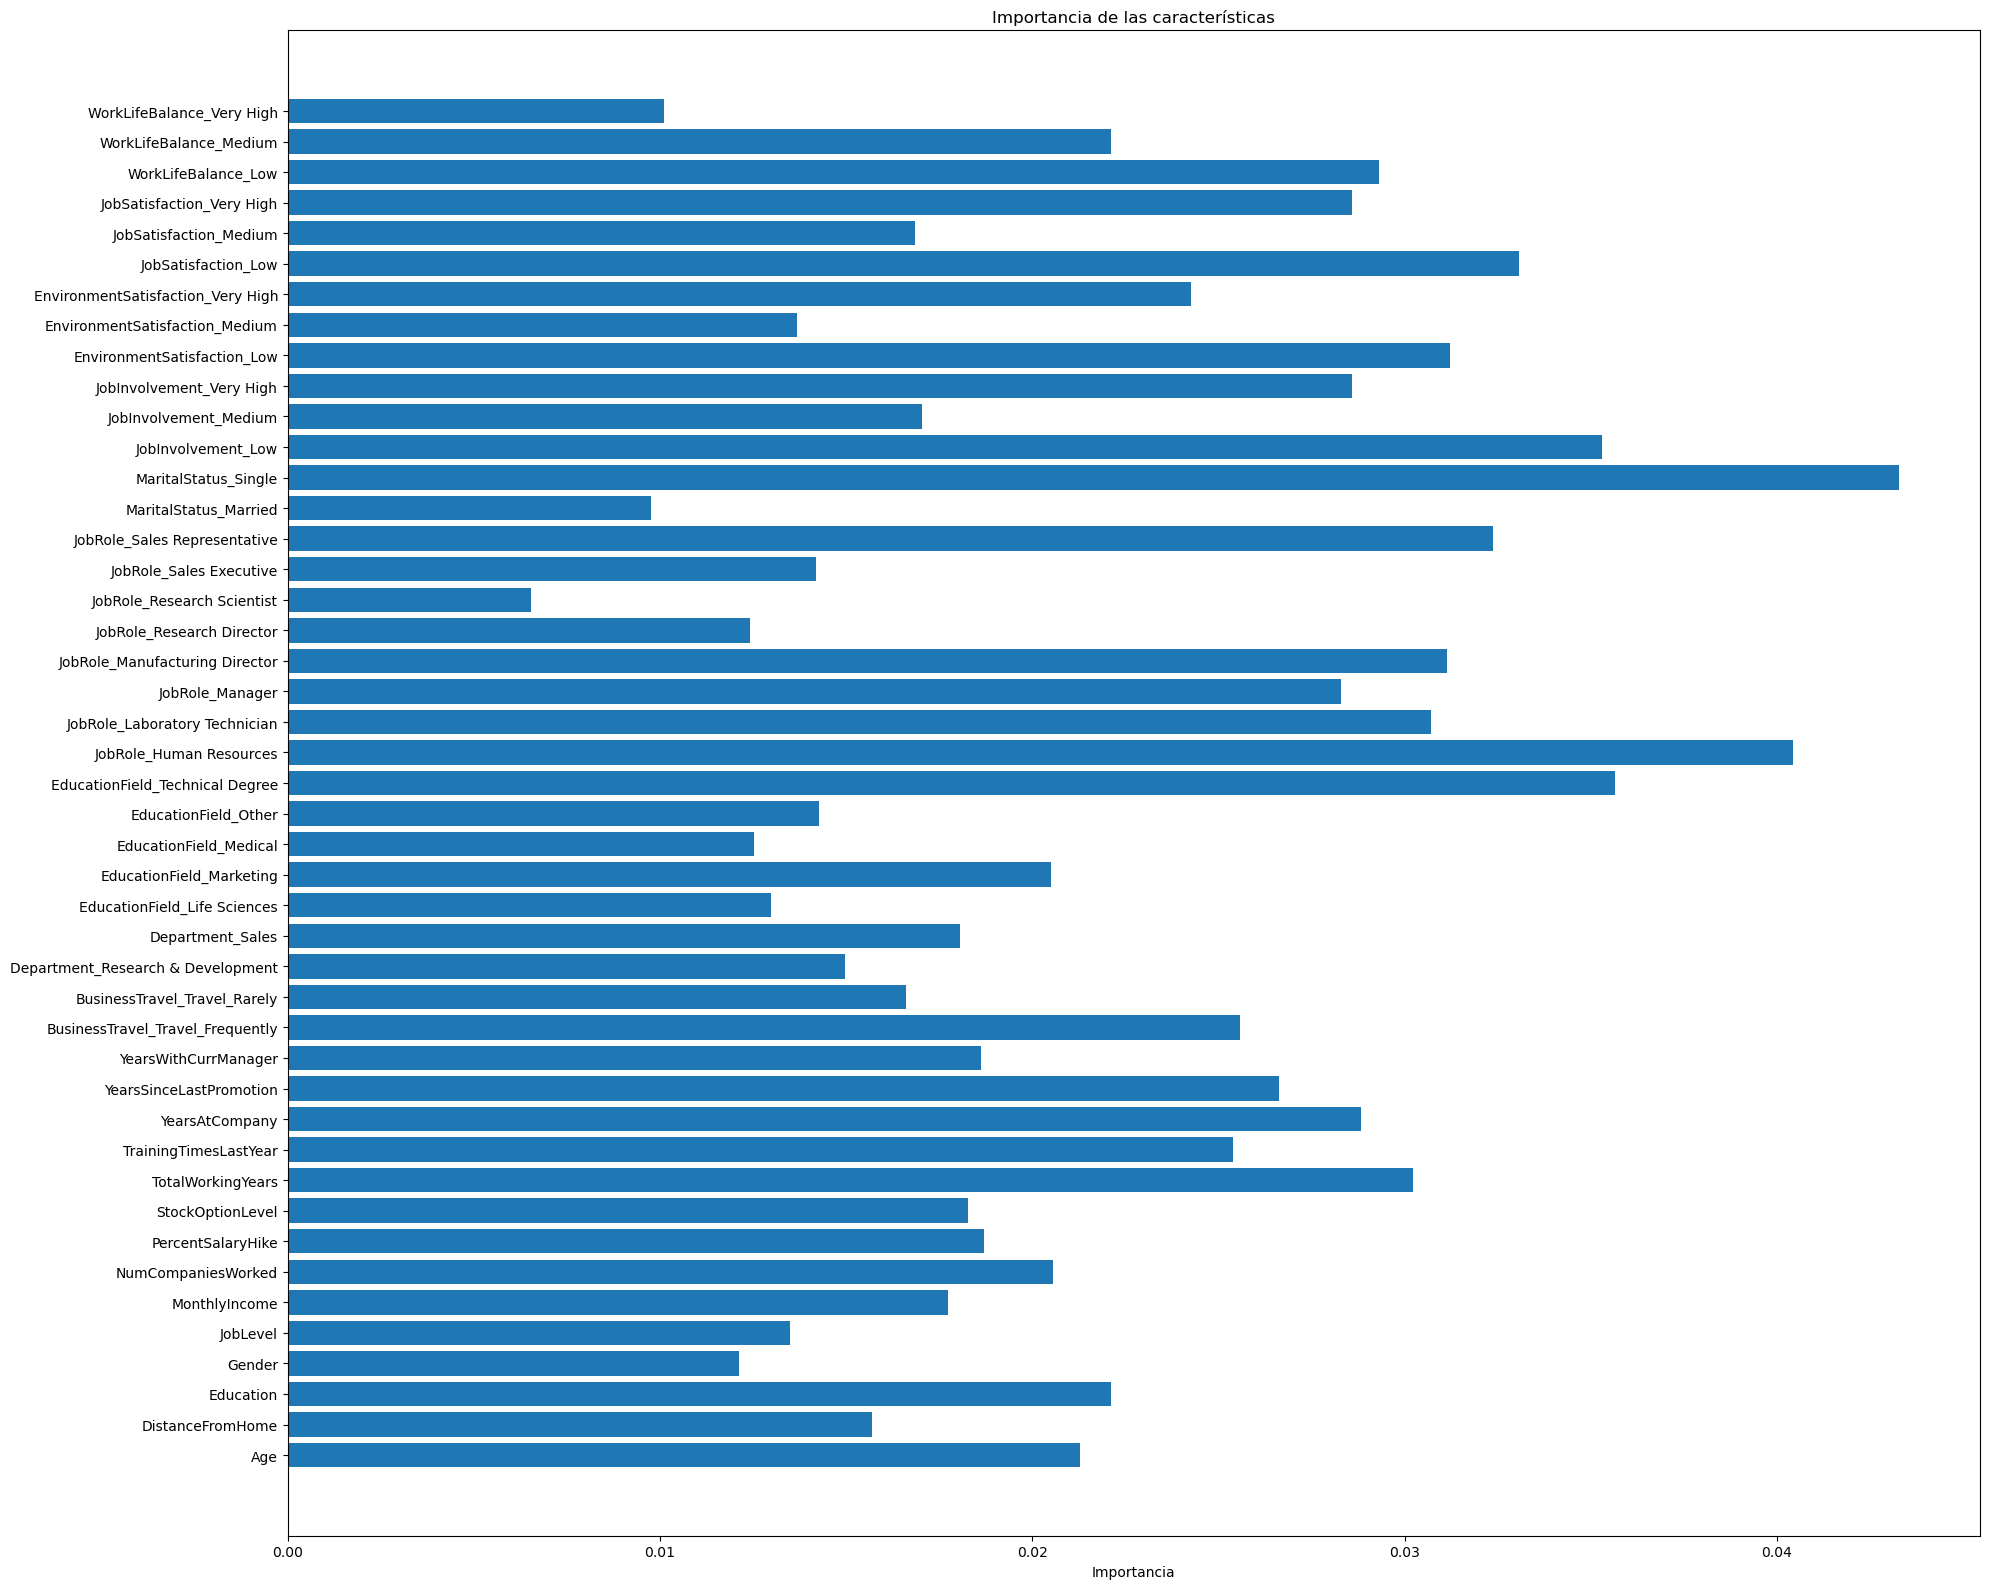

In [70]:
plt.figure(figsize=(20, 16))
plt.barh(X_train.columns, xgb_model.feature_importances_)
plt.title('Importancia de las características')
plt.xlabel('Importancia')
plt.tight_layout()
plt.show()

In [71]:
X_test.shape

(1103, 45)

In [72]:
X_corr = X_train.corr()

<Axes: >

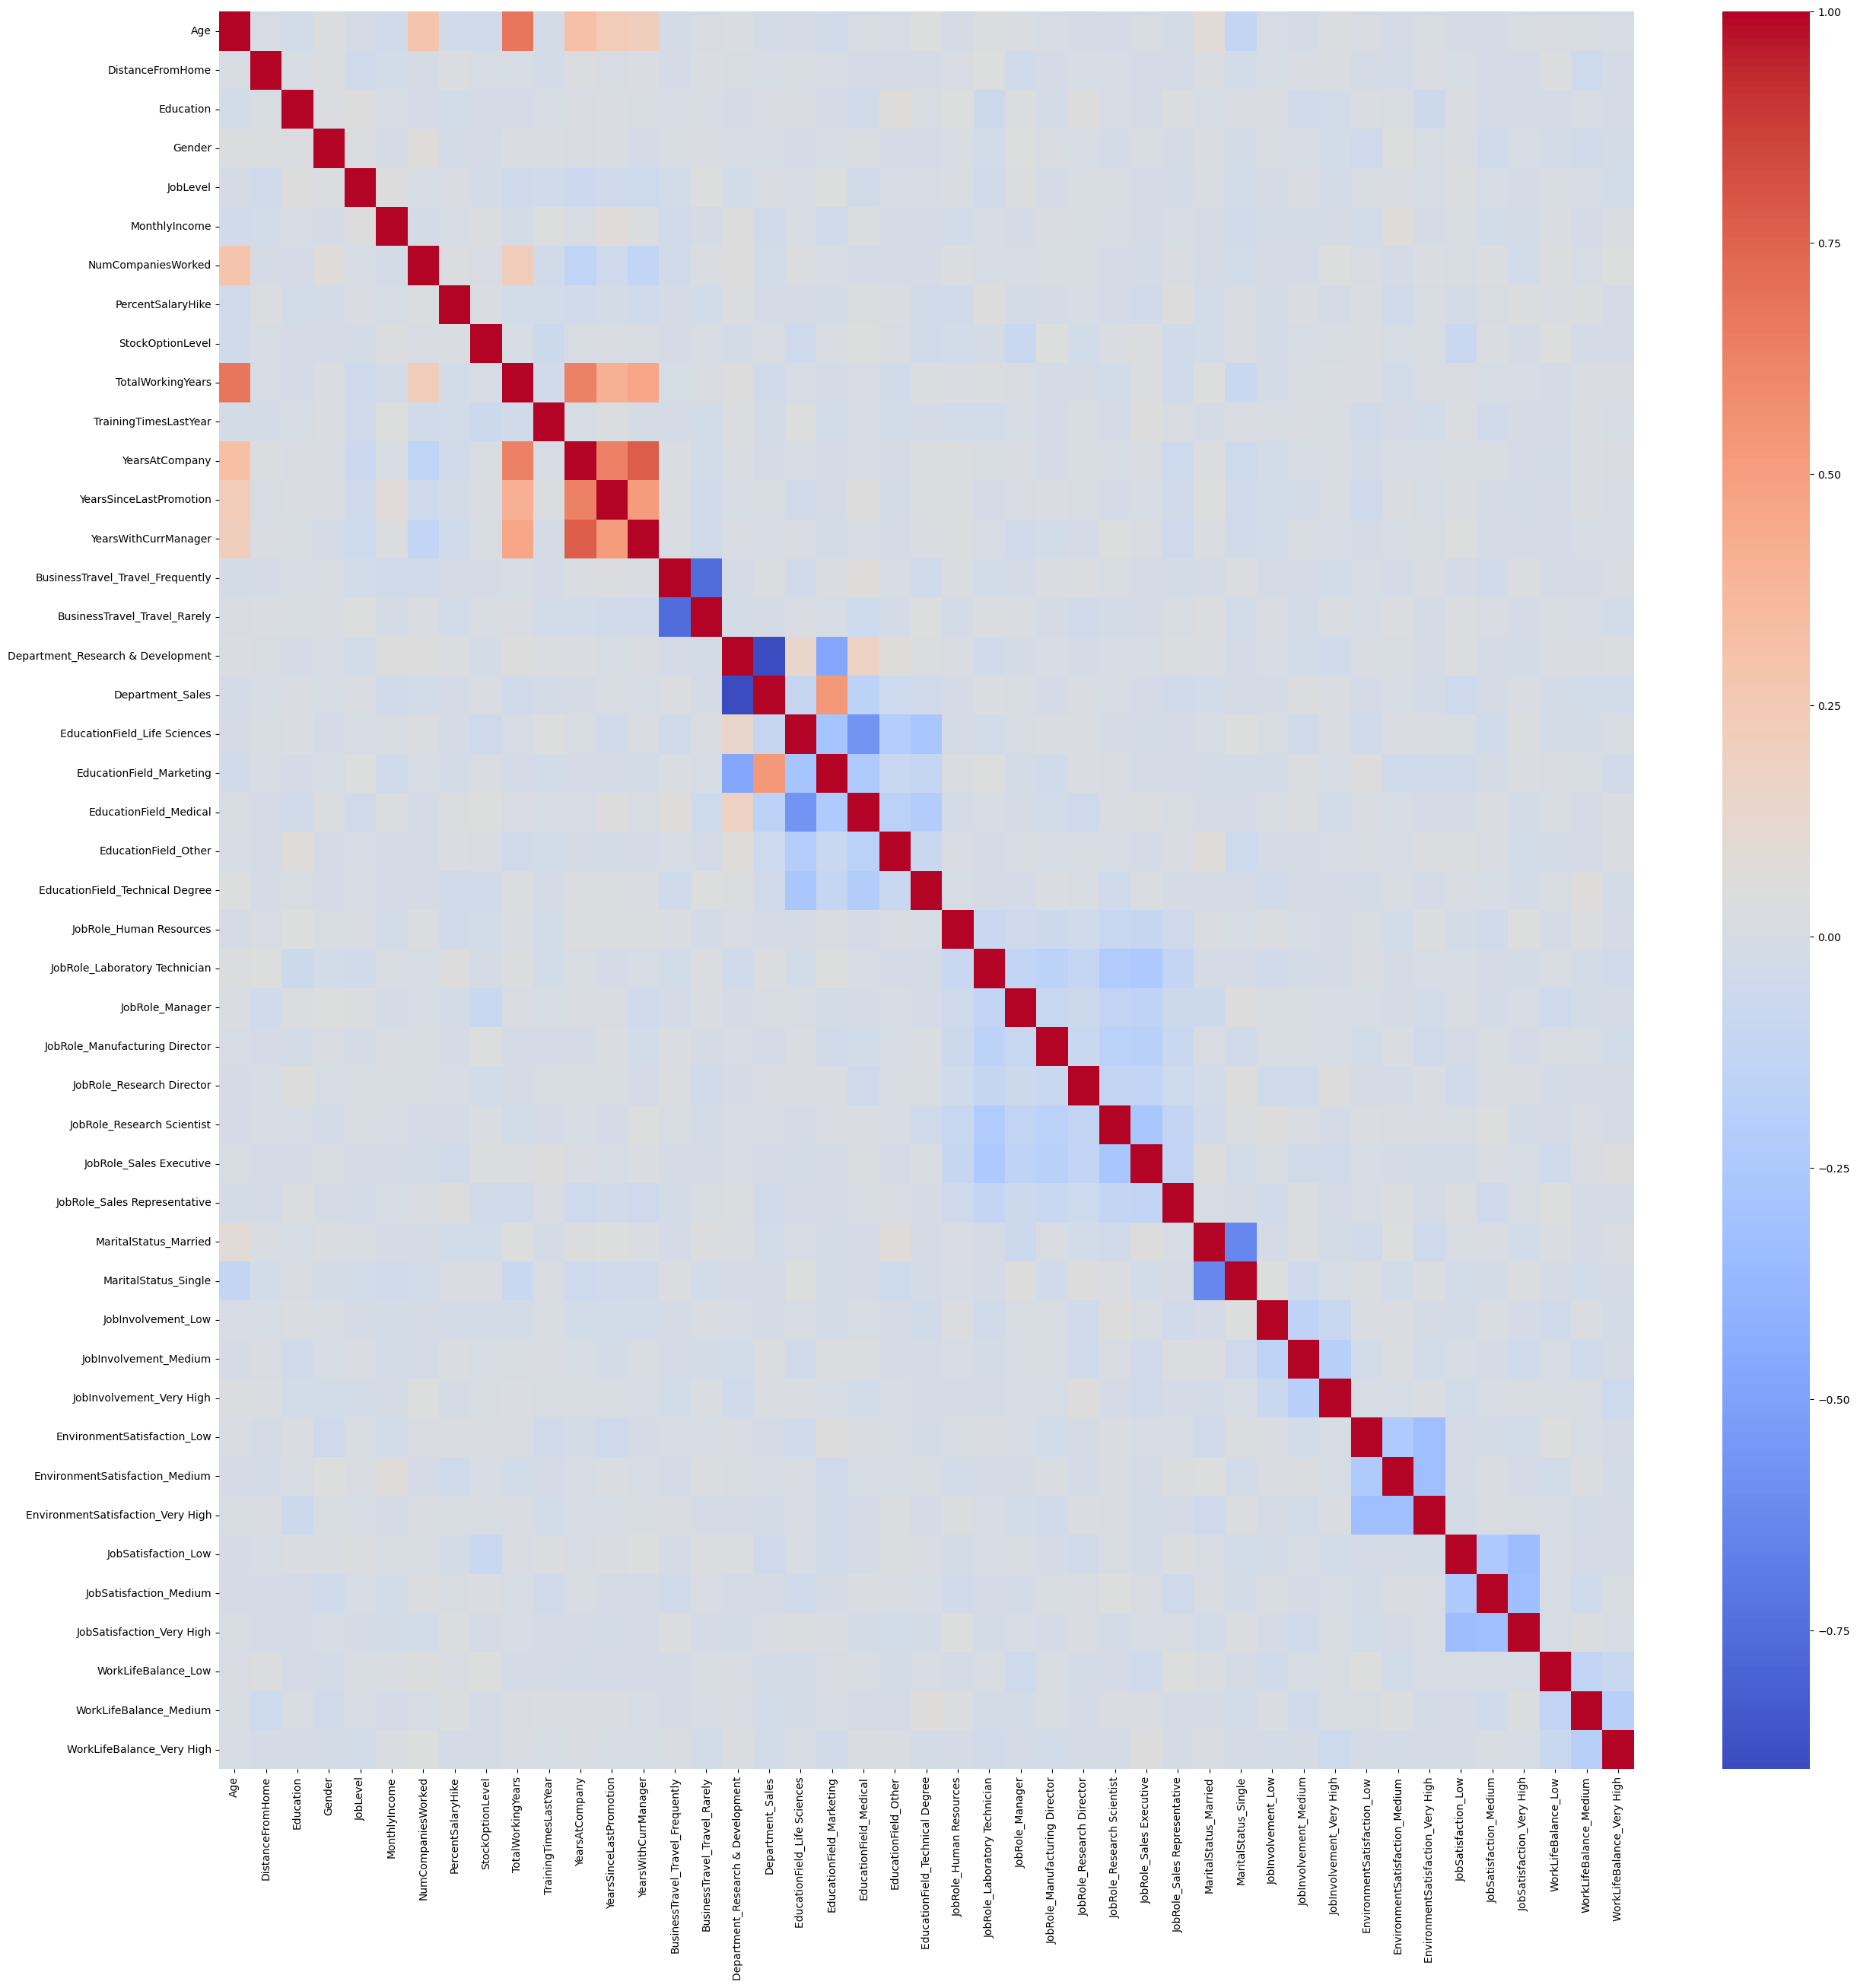

In [73]:
plt.figure(figsize = (30, 30))
sns.heatmap(data = X_corr, cmap = "coolwarm")

In [75]:
X_train.dtypes

Age                                    int64
DistanceFromHome                       int64
Education                              int64
Gender                                 int32
JobLevel                               int64
MonthlyIncome                          int64
NumCompaniesWorked                   float64
PercentSalaryHike                      int64
StockOptionLevel                       int64
TotalWorkingYears                    float64
TrainingTimesLastYear                  int64
YearsAtCompany                         int64
YearsSinceLastPromotion                int64
YearsWithCurrManager                   int64
BusinessTravel_Travel_Frequently        bool
BusinessTravel_Travel_Rarely            bool
Department_Research & Development       bool
Department_Sales                        bool
EducationField_Life Sciences            bool
EducationField_Marketing                bool
EducationField_Medical                  bool
EducationField_Other                    bool
EducationF

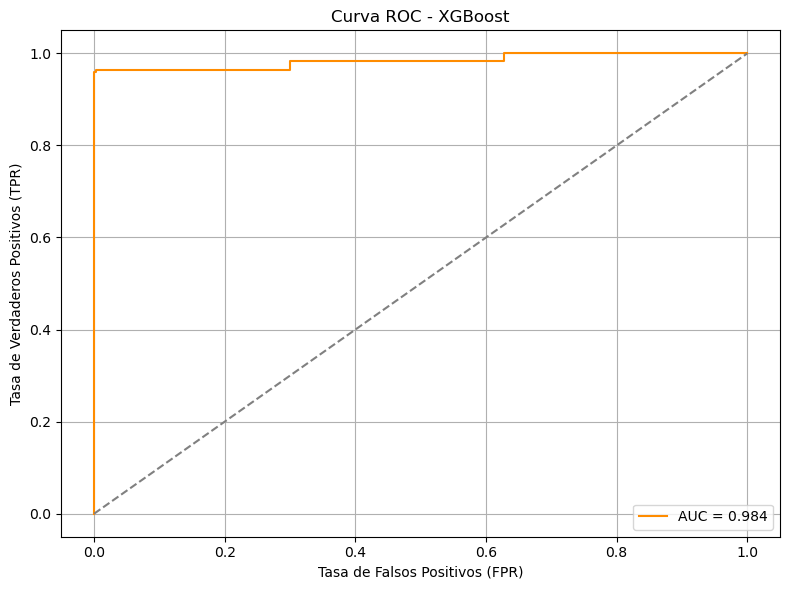

In [76]:
from sklearn.metrics import roc_curve, roc_auc_score

y_proba = xgb_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}", color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - XGBoost')
plt.legend(loc ='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [77]:
auc

0.9837173405617048